##   Forest fires 

#### what is forest fire 

forest, bush or vegetation fire can be describe as any uncontrolled and non-prescribed combustion or burning of plants in a natural setting such as a forest, grassland, etc.
In this project, we are not determining if a forest fire will take place or not, we are *predicting* the confidence of the forest fire based on some attributes

### Details of the project 
1. Building a machine learning model to predict forest fire confidence
2. building a web app on Django to mount the predicted model.
3. deploying the Django project on heroku through github

Machine Learning model.
we will start off with building a machine learning model using RandomForestRegression model and train the model using the dataset.



##### importing libraries

In [77]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


##### reading the data....

In [78]:
forest_data = pd.read_csv('fire_archive.csv')

In [79]:
forest_data

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,1.1,2019-09-30,1644,Aqua,MODIS,85,6.3,292.9,14.2,N,0
36007,-28.2625,128.5494,304.9,1.0,1.0,2019-09-30,1644,Aqua,MODIS,27,6.3,290.9,6.4,N,0
36008,-28.2941,128.5123,301.7,1.0,1.0,2019-09-30,1644,Aqua,MODIS,43,6.3,290.4,5.5,N,0
36009,-28.3001,128.5530,303.6,1.0,1.0,2019-09-30,1644,Aqua,MODIS,41,6.3,290.3,5.7,N,0


In [80]:
forest_data.shape

(36011, 15)

In [81]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36011 entries, 0 to 36010
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    36011 non-null  float64
 1   longitude   36011 non-null  float64
 2   brightness  36011 non-null  float64
 3   scan        36011 non-null  float64
 4   track       36011 non-null  float64
 5   acq_date    36011 non-null  object 
 6   acq_time    36011 non-null  int64  
 7   satellite   36011 non-null  object 
 8   instrument  36011 non-null  object 
 9   confidence  36011 non-null  int64  
 10  version     36011 non-null  float64
 11  bright_t31  36011 non-null  float64
 12  frp         36011 non-null  float64
 13  daynight    36011 non-null  object 
 14  type        36011 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 4.1+ MB


In [82]:
forest_data.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [83]:
forest_data.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,3.728625e-12,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


In [84]:
forest_fire_col = forest_data.columns
forest_fire_col

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [85]:
forest_corr = forest_data.corr()

<AxesSubplot:>

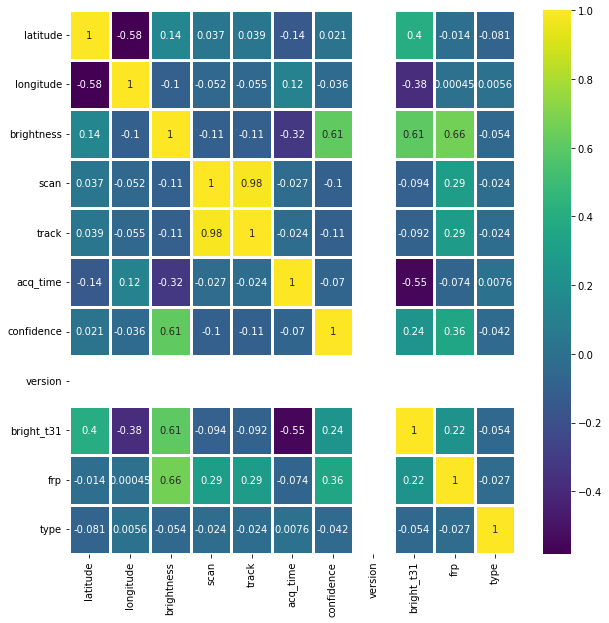

In [86]:
plt.figure(figsize=(10,10))
sns.heatmap(forest_corr,annot=True,cmap='viridis',linewidths=3)

In [87]:
forest_corr[forest_corr > 0.5]

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
latitude,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brightness,NaN,NaN,1.000000,NaN,NaN,NaN,0.614691,NaN,0.606844,0.661131,NaN
scan,NaN,NaN,NaN,1.000000,0.982484,NaN,NaN,NaN,NaN,NaN,NaN
track,NaN,NaN,NaN,0.982484,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
acq_time,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
confidence,NaN,NaN,0.614691,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
version,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bright_t31,NaN,NaN,0.606844,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
frp,NaN,NaN,0.661131,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [88]:
forest_corr[forest_corr < -0.5]

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
latitude,NaN,-0.582625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,-0.582625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brightness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acq_time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.552448,NaN,NaN
confidence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
version,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bright_t31,NaN,NaN,NaN,NaN,NaN,-0.552448,NaN,NaN,NaN,NaN,NaN
frp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


from the data we can see that scan and track has a very high correlation, close to 1, so we can say the two features are contributing the same thing to the data, because of this we will need to reduce our dimentionality because both track and scan are contributing same thing to the dataset.

i will drop track here...

In [89]:
forest_data.drop(['track'],axis=1,inplace=True)

##### finding categorical data

In [90]:
for items in forest_data.columns:
    print(f'the {items} column with count {forest_data[items].value_counts()}')

the latitude column with count -15.5842    6
-16.6222    5
-12.6690    5
-12.6623    5
-15.4331    5
           ..
-33.5263    1
-26.1405    1
-30.3511    1
-29.8006    1
-28.3001    1
Name: latitude, Length: 30310, dtype: int64
the longitude column with count 130.8793    6
152.4302    6
130.7639    6
130.7663    6
130.7453    6
           ..
146.8303    1
150.6943    1
146.6338    1
146.6232    1
121.4995    1
Name: longitude, Length: 31127, dtype: int64
the brightness column with count 328.8    159
328.9    152
328.0    143
328.7    139
328.6    137
        ... 
392.1      1
390.7      1
384.3      1
378.7      1
409.0      1
Name: brightness, Length: 1182, dtype: int64
the scan column with count 1.0    8284
1.1    6000
1.2    3021
1.3    2412
1.4    1848
1.5    1610
1.6    1451
1.7    1281
1.8    1041
1.9     847
2.0     707
2.2     691
2.1     649
2.3     608
2.5     468
2.4     433
2.8     422
3.0     402
2.7     366
2.9     361
2.6     347
3.1     259
3.2     244
3.6     219
3.4 

we can see that the data has a lot of unique values which which when treated as a categorical data will increase the dimensionality.

we also have some features that can be treated as categorical data, by using one-hot encoding, this is because they have few unique values, 
also note that we have some features with only one unique value, tjhis will be removed from the data because it won't really contribute to the model...
it will only increase our dimensionality.

so the features with only one unique value are 'the instrument column' and the 'version column'

In [91]:
forest_data.drop(['instrument','version'],axis=1,inplace=True)

In [92]:
forest_data.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,Terra,48,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,Terra,71,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,Terra,42,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,Terra,33,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,Terra,36,298.8,27.6,D,0


In [93]:
forest_data['satellite'] = forest_data['satellite'] .astype('category')
forest_data['daynight'] = forest_data['daynight'] .astype('category')

In [94]:
forest_data['satellite'] = forest_data['satellite'].cat.codes
forest_data['daynight'] = forest_data['daynight'].cat.codes

In [95]:
forest_data['satellite'] = forest_data['satellite'] .astype('float64')
forest_data['daynight'] = forest_data['daynight'] .astype('float64')

In [96]:
forest_data.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1.0,48,297.3,6.6,0.0,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1.0,71,297.3,11.3,0.0,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1.0,42,298.7,23.1,0.0,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1.0,33,296.1,6.5,0.0,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1.0,36,298.8,27.6,0.0,0


looking for another column type

In [97]:
forest_data['type'].value_counts()

0    35666
2      335
3       10
Name: type, dtype: int64

we will one-hot encode this feature, more reason because it has more than 2 feature which if we leave it, it may assume it a rank

In [98]:
types = pd.get_dummies(forest_data['type'],prefix='type',drop_first=True)
forest_data = pd.concat([forest_data,types],axis=1)

In [99]:
forest_data

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type,type_2,type_3
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1.0,48,297.3,6.6,0.0,0,0,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1.0,71,297.3,11.3,0.0,0,0,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1.0,42,298.7,23.1,0.0,0,0,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1.0,33,296.1,6.5,0.0,0,0,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1.0,36,298.8,27.6,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,2019-09-30,1644,0.0,85,292.9,14.2,1.0,0,0,0
36007,-28.2625,128.5494,304.9,1.0,2019-09-30,1644,0.0,27,290.9,6.4,1.0,0,0,0
36008,-28.2941,128.5123,301.7,1.0,2019-09-30,1644,0.0,43,290.4,5.5,1.0,0,0,0
36009,-28.3001,128.5530,303.6,1.0,2019-09-30,1644,0.0,41,290.3,5.7,1.0,0,0,0


In [100]:
max(forest_data['scan']),min(forest_data['scan'])

(4.8, 1.0)

Now we will convert 'scan' column to categorical type, we will be doing this using ***bining*** method.
**range of this feature was 1 to 4.8**

In [101]:
bins = [0,1,2,3,4,5]
labels = [1,2,3,4,5]
forest_data['scan_binned'] = pd.cut(forest_data['scan'],bins=bins,labels=labels)

In [102]:
forest_data.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type,type_2,type_3,scan_binned
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1.0,48,297.3,6.6,0.0,0,0,0,1
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1.0,71,297.3,11.3,0.0,0,0,0,1
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1.0,42,298.7,23.1,0.0,0,0,0,4
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1.0,33,296.1,6.5,0.0,0,0,0,2
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1.0,36,298.8,27.6,0.0,0,0,0,4


#### next we will convert the datatime to real datetime type

In [103]:
forest_data['acq_date'] = pd.to_datetime(forest_data['acq_date'])

In [104]:
forest_data['year'] = forest_data['acq_date'].dt.year
forest_data['month'] = forest_data['acq_date'].dt.month
forest_data['day'] = forest_data['acq_date'].dt.day

we will need to drop the features we dont need, but first we need to specify our dependent feature

In [105]:
forest_data_y = forest_data['confidence']

In [106]:
forest_data.drop(['scan','confidence','type','acq_date','acq_time','bright_t31'],axis=1,inplace=True)

In [107]:
forest_data['scan_binned'] = forest_data['scan_binned'] .astype('float64')

In [108]:
forest_data

,latitude,longitude,brightness,satellite,frp,daynight,type_2,type_3,scan_binned,year,month,day
0,-11.8070,142.0583,313.0,1.0,6.6,0.0,0,0,1.0,2019,8,1
1,-11.7924,142.0850,319.3,1.0,11.3,0.0,0,0,1.0,2019,8,1
2,-12.8398,132.8744,311.6,1.0,23.1,0.0,0,0,4.0,2019,8,1
3,-14.4306,143.3035,310.1,1.0,6.5,0.0,0,0,2.0,2019,8,1
4,-12.4953,131.4897,310.3,1.0,27.6,0.0,0,0,4.0,2019,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,0.0,14.2,1.0,0,0,2.0,2019,9,30
36007,-28.2625,128.5494,304.9,0.0,6.4,1.0,0,0,1.0,2019,9,30
36008,-28.2941,128.5123,301.7,0.0,5.5,1.0,0,0,1.0,2019,9,30
36009,-28.3001,128.5530,303.6,0.0,5.7,1.0,0,0,1.0,2019,9,30


so next we will check the data to see if the independent features are correlated, this is to avoid, collinearity in the independent features

<AxesSubplot:>

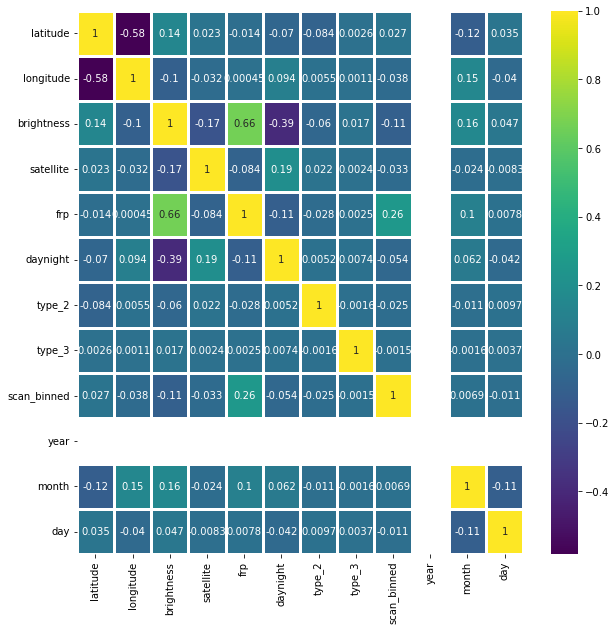

In [109]:
forest_corr = forest_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(forest_corr,annot=True,cmap='viridis',linewidths=3)

we can also see that the year will has no effect because it has 1 unique value, so i will remove the year feature toom

In [110]:
forest_data.drop(['year'],axis=1,inplace=True)

In [111]:
forest_data.tail(10)

,latitude,longitude,brightness,satellite,frp,daynight,type_2,type_3,scan_binned,month,day
36001,-29.1196,122.9981,306.7,0.0,17.8,1.0,0,0,2.0,9,30
36002,-29.1225,123.0141,300.6,0.0,10.6,1.0,0,0,2.0,9,30
36003,-28.0557,131.6349,305.2,0.0,7.9,1.0,0,0,2.0,9,30
36004,-28.0572,131.6473,302.1,0.0,5.7,1.0,0,0,2.0,9,30
36005,-28.0640,131.6209,323.5,0.0,27.4,1.0,0,0,2.0,9,30
36006,-28.0656,131.6334,312.7,0.0,14.2,1.0,0,0,2.0,9,30
36007,-28.2625,128.5494,304.9,0.0,6.4,1.0,0,0,1.0,9,30
36008,-28.2941,128.5123,301.7,0.0,5.5,1.0,0,0,1.0,9,30
36009,-28.3001,128.5530,303.6,0.0,5.7,1.0,0,0,1.0,9,30
36010,-30.8641,121.4995,309.1,0.0,23.0,1.0,1,0,2.0,9,30


In [112]:
X_train, X_test, y_train, y_test = train_test_split(forest_data,forest_data_y,test_size=0.2,random_state=0)

In [113]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.3,random_state=0)


## we will use the classification library to make our analysis

In [114]:
rand_forest_model = RandomForestClassifier(n_estimators=300,random_state=42,n_jobs=-1)

In [115]:
# FITTING THE MODEL
rand_forest_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [116]:
# PREDICTING USING VALIDATION DATA
y_pred = rand_forest_model.predict(X_val)

In [117]:
# getting features importance 
pd.DataFrame(rand_forest_model.feature_importances_,index=[forest_data.columns])

,0
latitude,0.174303
longitude,0.174467
brightness,0.258930
satellite,0.020797
frp,0.191875
daynight,0.012264
type_2,0.002505
type_3,0.000007
scan_binned,0.030101
month,0.017463


In [118]:
rand_forest_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [119]:
score_result = rand_forest_model.score(X_train,y_train) * 100

In [120]:
print(f'{round(score_result,2)} % ')

100.0 % 


In [121]:
# teting the validation data
score_result = rand_forest_model.score(X_test,y_test) * 100

In [122]:
print(f'{round(score_result,2)} % ')

21.09 % 


we can see that Random Forest gave us a very small accuracy, because of this we will use another library

here i will use CatBoostRegressor to build this confidence 

### so let start to make the prediction using the CatBoost library

In [141]:
# getting the categorical features 
cat_feature = np.where(X_train.dtypes != np.float64)[0]
cat_feature

array([ 6,  7,  9, 10], dtype=int64)

In [125]:
!jupyter nbextension enable --py widgetsnbextension

from catboost import CatBoostRegressor
# import Pool
from catboost import Pool
train_pool = Pool(data = X_train,label = y_train,cat_features=cat_feature)
val_pool = Pool(data=X_val,label=y_val,cat_features=cat_feature)

model = CatBoostRegressor(iterations=30000 ,loss_function='RMSE',cat_features=cat_feature,use_best_model=True,train_dir='forest_fire_model')


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [126]:
model.fit(X=train_pool,eval_set=val_pool,verbose=20,plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.010249
0:	learn: 23.0118744	test: 23.1837324	best: 23.1837324 (0)	total: 245ms	remaining: 2h 2m 15s
20:	learn: 20.9504401	test: 21.1302942	best: 21.1302942 (20)	total: 3.33s	remaining: 1h 19m 17s
40:	learn: 19.3665389	test: 19.5497348	best: 19.5497348 (40)	total: 5.31s	remaining: 1h 4m 40s
60:	learn: 18.1836006	test: 18.3727261	best: 18.3727261 (60)	total: 6.92s	remaining: 56m 37s
80:	learn: 17.2933076	test: 17.4890854	best: 17.4890854 (80)	total: 9.04s	remaining: 55m 41s
100:	learn: 16.6192859	test: 16.8205415	best: 16.8205415 (100)	total: 10.4s	remaining: 51m 6s
120:	learn: 16.1175994	test: 16.3224917	best: 16.3224917 (120)	total: 11.3s	remaining: 46m 27s
140:	learn: 15.7397080	test: 15.9510433	best: 15.9510433 (140)	total: 12.3s	remaining: 43m 16s
160:	learn: 15.4471131	test: 15.6656802	best: 15.6656802 (160)	total: 13.1s	remaining: 40m 30s
180:	learn: 15.2166484	test: 15.4429423	best: 15.4429423 (180)	total: 13.9s	remaining: 38m 14s
200:	learn: 15.0330004	tes

In [142]:
model.best_score_
model.score(X_test,y_test)


CatBoostError: Wrong initializing y: X is catboost.Pool object, y must be initialized inside catboost.Pool.

In [129]:
model.best_score_

{'learn': {'RMSE': 9.08190135336888},
 'validation': {'RMSE': 13.432653046008975}}

In [136]:
X_test = Pool(data=X_test,label=y_test,cat_features=cat_feature)
model.eval_metrics(metrics='RMSE',data=X_test)

{'RMSE': [23.036048116552063,
  22.91940140608246,
  22.80448964795586,
  22.693484995224633,
  22.5801686658405,
  22.471171583343747,
  22.363484276224256,
  22.257492400321397,
  22.1512476509116,
  22.05301104911605,
  21.950365799828305,
  21.85144391520241,
  21.755510872639487,
  21.65534928217941,
  21.55825164278544,
  21.465985957635098,
  21.372375894411455,
  21.27987250447241,
  21.18811529961071,
  21.09946979220962,
  21.012118141103567,
  20.921519581065688,
  20.83549316187276,
  20.751445029386655,
  20.66392403069232,
  20.580358477653288,
  20.500445253827,
  20.41934745045488,
  20.339476095197092,
  20.258875911736368,
  20.18030164194862,
  20.103758491677997,
  20.027682950212387,
  19.95109036633569,
  19.8766333128381,
  19.80202543048235,
  19.73214671913344,
  19.660830917656355,
  19.593350674733486,
  19.52428683615031,
  19.455653663255315,
  19.389974370917876,
  19.323873786659977,
  19.259471461289806,
  19.195749219283993,
  19.132379590139397,
  19.0

In [139]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,brightness,32.371591
1,frp,15.413172
2,daynight,13.129527
3,latitude,12.433128
4,longitude,11.634227
5,day,5.540882
6,scan_binned,4.995248
7,month,2.254997
8,satellite,2.107537
9,type_2,0.119463


In [140]:
model.score(X_val,y_val)

0.6678002686470088

In [143]:
model.save_model('forest_fire_cbm_format_model',format='cbm')

using another method to save model by pickle

In [145]:
# SAVING THE TRAINING MODEL AS A PICKLE STRING
import pickle
pickle.dump(model,open('pickled_forest_fire_model.pickle','wb'))

# we can load the pickle model by using 'pickle.load()' and alos predicting by typing 'pickle.load().predict()'

so let try to predict our values in the test set and see how close we are

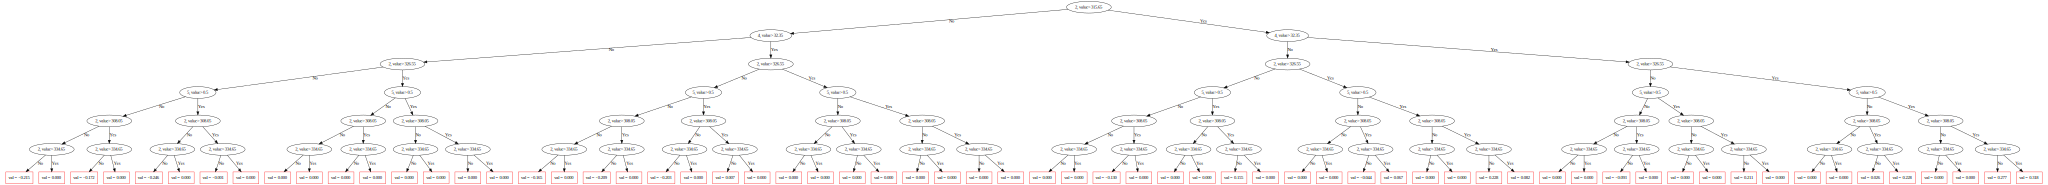

In [150]:
model.plot_tree(1)

In [171]:
y_pred = model.predict(X_test)

In [172]:
comparison =  pd.DataFrame(list(zip(y_pred,y_test)),columns=['predicted_value','actual_value'])

In [173]:
comparison.head(20)

,predicted_value,actual_value
0,68.974917,62
1,51.276350,56
2,102.821102,100
3,84.553443,89
4,78.382297,84
5,73.089814,64
6,79.186591,58
7,75.116832,85
8,62.292597,69
9,77.646497,79


In [174]:
comparison.tail(10)

,predicted_value,actual_value
7193,69.097341,69
7194,41.574688,51
7195,94.456839,94
7196,57.697553,22
7197,55.105626,55
7198,27.579732,35
7199,54.637059,35
7200,89.062190,92
7201,85.118603,91
7202,77.049133,61


<AxesSubplot:ylabel='Count'>

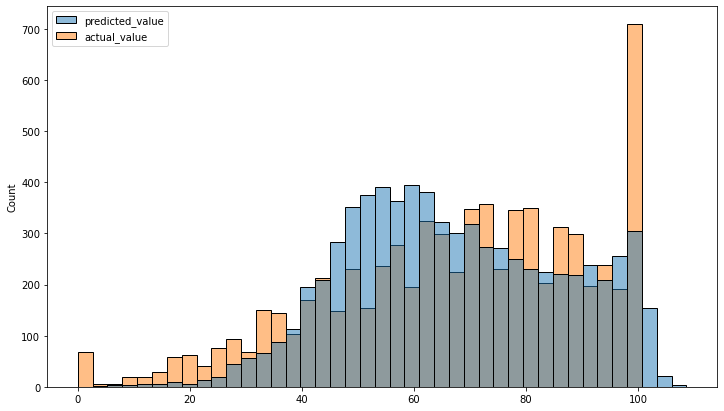

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,7))
sns.histplot(comparison)


In [175]:
comparison.describe()

,predicted_value,actual_value
count,7203.000000,7203.000000
mean,67.273759,67.438845
std,19.229252,23.156111
min,5.000418,0.000000
25%,52.672924,52.000000
50%,65.261366,70.000000
75%,82.667987,86.000000
max,108.605177,100.000000


<Figure size 864x864 with 0 Axes>

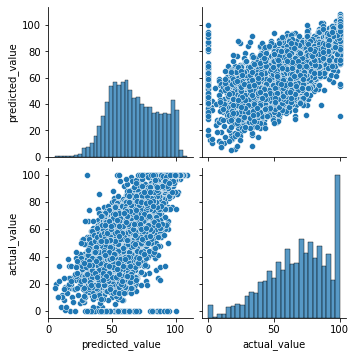

In [185]:
sns.pairplot(comparison)

<AxesSubplot:ylabel='confidence'>

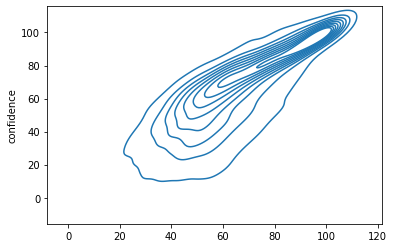

In [186]:
sns.kdeplot(x=y_pred,y=y_test)

conclusion:
    The model do not really perform well due to the deviance in the data, we could only get an accuracy max of 67% which means 33 percent of the time our model will be wrong,
    so we can decide to check the deviation of the data  

In [176]:
len(y_pred),len(y_test)

(7203, 7203)

In [177]:
from sklearn import metrics
metrics.mean_squared_error(y_test,y_pred)

183.31399108259382

####  the deviation is a little bit big, well we move...

this is the end of the project